# Why Deep learning Neural Networks ?

$S_{w, b}(x) = \frac{1}{1 + e^{-(wx + b)}}$

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
from sklearn.metrics import accuracy_score,mean_squared_error

In [0]:
class SigmoidFunction:
  def __init__(self):
    self.w = None
    self.b = None
    #np.random.seed(0)
    
  def sigmoid(self,x):
    weighted_sum = np.dot(self.w,x) + self.b
    return 1.0/(1.0 + (np.exp(-(weighted_sum))))
  
  def grad_w(self,x,y):
    y_pred = self.sigmoid(x)
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b(self,x,y):
    y_pred = self.sigmoid(x)
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def fit(self,X,Y,epochs = 1, lr = 1, initialize = True):
    #initialize w,b
    if initialize:
      np.random.seed(6)
      self.w = np.random.randn(1,X.shape[1])
      self.b = 0
      
    plot_loss = {}
    
    for i in range(epochs):
      dw = 0
      db = 0
      for x,y in zip(X,Y):
        dw += self.grad_w(x,y)
        db += self.grad_b(x,y)
      self.w -= lr*dw
      self.b -= lr*db
      plot_loss[i] = self.Loss(X,Y)
      
#     plt.plot(plot_loss.values())
#     plt.xlabel("epochs")
#     plt.ylabel("Loss")
#     plt.title("Visualization of Loss VS Epochs");
  
  def predict(self,X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)
  
  
  def Loss(self,X,Y):
    loss = 0
    Y_pred = self.predict(X)
    loss = mean_squared_error(Y,Y_pred)
    return loss
    
  def accuracy_value(self,X,Y,threshold = 0.5):
    Y_pred = self.predict(X)
    Y_pred = (Y_pred >= threshold).astype(int)
    accuracy = accuracy_score(Y_pred,Y)
    return accuracy

# Test Data

In [0]:
X = np.asarray([[1,1], [2, 1], [2, -1], [3,2], [0, 2], [-1, 2],[-2,1],[-3,4]])
Y = [1, 1, 1, 1, 0, 0, 0, 0]

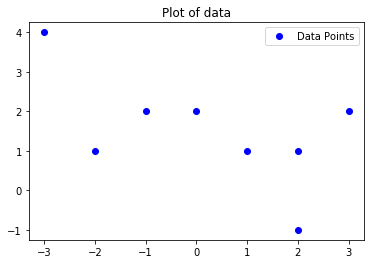

In [0]:
plt.title("Plot of data")
plt.plot(X[:,0],X[:,1],'o',color = 'b',label = 'Data Points')
plt.legend();

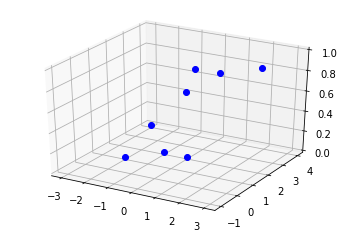

In [0]:
ax = plt.axes(projection = '3d')
ax.plot(X[:,0],X[:,1],Y,'o',color = 'b');

# Performing Fit

In [0]:
sf = SigmoidFunction()
sf.fit(X,Y,1,0.25)

In [0]:
X1 = np.linspace(-10,10,100)
X2 = np.linspace(-10,10,100)

XX1,XX2 = np.meshgrid(X1,X2)
YY = np.zeros(XX1.shape)

for i in range(X1.size):
  for j in range(X2.size):
    val = np.asarray([X1[i],X2[j]])
    YY[i,j] = np.asarray(sf.sigmoid(val))

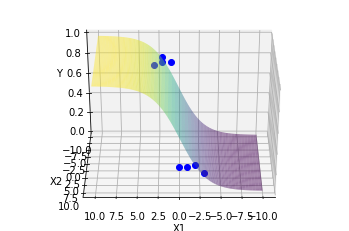

In [0]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_surface(XX1,XX2,YY, cmap = 'viridis', alpha = 0.5)
ax.plot(X[:,0],X[:,1],Y,'o',color = 'b')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.view_init(30,90);

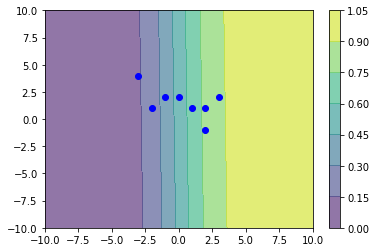

In [0]:
plt.contourf(XX1,XX2,YY,cmap = 'viridis',alpha = 0.6)
plt.colorbar()
plt.plot(X[:,0],X[:,1],'o',color = 'b')
plt.show()

In [0]:
def plot_sf(X, Y, sf, ax):
  X1 = np.linspace(-10, 10, 100)
  X2 = np.linspace(-10, 10, 100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)
  
  for i in range(X1.size):
    for j in range(X2.size):
      val = np.asarray([X1[i], X2[j]])
      YY[i, j] = np.asarray(sf.sigmoid(val))
  ax.contourf(XX1, XX2, YY, cmap='coolwarm', alpha=0.5)  
  ax.scatter(X[:,0], X[:,1],c=Y, cmap='brg')
  ax.plot()

[[0.00750475 0.62573688]] [0.01242809]
[[0.63888997 0.19349971]] [-0.0586521]
[[ 0.92514351 -0.12343228]] [-0.1444324]
[[ 1.04327043 -0.21417399]] [-0.15430596]
[[ 1.13516503 -0.27499   ]] [-0.15491169]
[[ 1.21191807 -0.32125934]] [-0.15175013]
[[ 1.27849196 -0.35898973]] [-0.14679844]
[[ 1.33766275 -0.39112879]] [-0.14093507]
[[ 1.39116799 -0.41932654]] [-0.13460196]
[[ 1.44017555 -0.44459351]] [-0.12804058]
[[ 1.4855114  -0.46759087]] [-0.12139068]
[[ 1.52778276 -0.48877384]] [-0.11473635]
[[ 1.56745    -0.50846876]] [-0.1081295]
[[ 1.60487112 -0.52691749]] [-0.10160255]
[[ 1.64033041 -0.54430425]] [-0.09517566]
[[ 1.67405776 -0.5607727 ]] [-0.08886115]
[[ 1.70624196 -0.57643707]] [-0.08266614]
[[ 1.73704016 -0.59138983]] [-0.07659425]
[[ 1.76658475 -0.60570694]] [-0.07064679]
[[ 1.79498844 -0.61945165]] [-0.06482344]
[[ 1.82234808 -0.63267726]] [-0.0591228]
[[ 1.84874762 -0.64542915]] [-0.05354275]
[[ 1.87426039 -0.65774634]] [-0.04808065]
[[ 1.89895086 -0.66966265]] [-0.04273358]
[

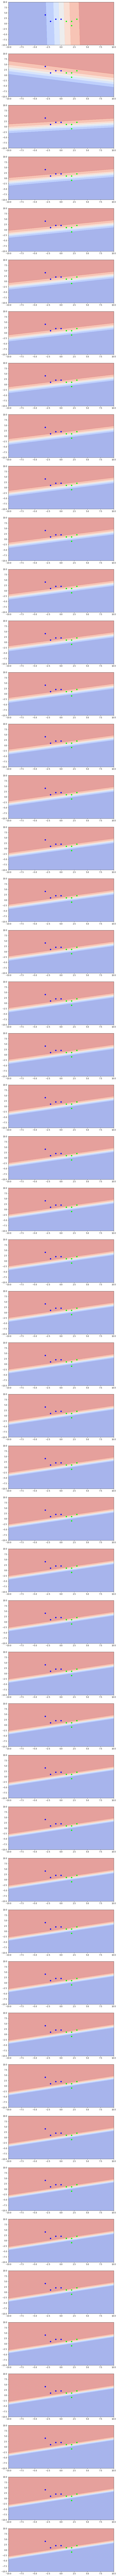

In [0]:
sf = SigmoidFunction()
sf.fit(X, Y, 1, 0.25, True)
N = 50
plt.figure(figsize=(10, N*5))
for i in range(N):
  print(sf.w, sf.b)
  ax = plt.subplot(N, 1, i + 1)
  plot_sf(X, Y, sf, ax)
  sf.fit(X, Y, 1, 0.5, False)

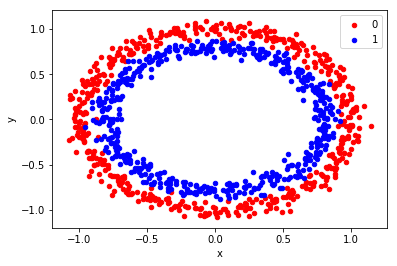

In [0]:
from sklearn.datasets import make_circles
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.05)
# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [0]:
X.shape

(1000, 2)

In [0]:
y.shape

(1000,)

In [0]:
y

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
#Split the data
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.1,random_state = 6)

In [0]:
sf = SigmoidFunction()
sf.fit(X_train,Y_train,1000,0.15)

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
y_pred_train = sf.sigmoid([X_train[:,0],X_train[:,1]])

In [0]:
y_pred_train

array([[0.02699759, 0.0196413 , 0.01733652, 0.02644572, 0.01719318,
        0.0188099 , 0.02042134, 0.02928982, 0.01994329, 0.02651928,
        0.02502647, 0.02028765, 0.01925769, 0.02404786, 0.0254903 ,
        0.02704857, 0.01784661, 0.02511535, 0.01823188, 0.01704704,
        0.02662287, 0.01945806, 0.0236587 , 0.0273721 , 0.01677255,
        0.01802448, 0.01745356, 0.01867556, 0.02460694, 0.02539158,
        0.01786154, 0.02650291, 0.01787156, 0.02908968, 0.01642722,
        0.0229431 , 0.02381301, 0.02451919, 0.02557185, 0.02733496,
        0.01845369, 0.02599109, 0.02826022, 0.02004994, 0.02282384,
        0.01874258, 0.02771975, 0.01698497, 0.01982831, 0.0207685 ,
        0.01967857, 0.01750746, 0.01747911, 0.0187064 , 0.02793115,
        0.01934707, 0.0267373 , 0.02432646, 0.02484546, 0.02582719,
        0.02010105, 0.02190773, 0.01704592, 0.02565086, 0.01829354,
        0.01724119, 0.02444345, 0.02203753, 0.01963765, 0.02884873,
        0.01720845, 0.02121943, 0.02682049, 0.01

In [0]:
y_bin_train = (y_pred_train>= 0.5).astype(int)
y_bin_train

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [0]:
y_bin_train.shape

(1, 900)

In [0]:
Y_train.shape

(900,)

In [0]:
accuracy_score(y_bin_train.T,Y_train) # We have passed transpose of y_bin_train to match the dimension of Y_train as above

0.5011111111111111

# Deep Neural Networks

In [0]:
from keras import models
from keras import layers
from keras import losses
from keras import optimizers
from keras import metrics
# You can also import in a single line

In [0]:
network = models.Sequential() #Linear stack of layers
network.add(layers.Dense(16,activation = 'sigmoid', input_shape = (X.shape[1],))) # Dense - Fully connected neural network
network.add(layers.Dense(16,activation = 'sigmoid'))
network.add(layers.Dense(1,activation = 'sigmoid'))

In [0]:
#RMS Prop = Gradient Descent with slight difference
network.compile(optimizer = optimizers.RMSprop(lr = 0.015),
               loss = losses.mean_squared_error,
               metrics = ['accuracy'])

In [0]:
history = network.fit(X_train,
                     Y_train,
                     epochs = 1000,
                     validation_data = (X_test,Y_test))

Train on 900 samples, validate on 100 samples
Epoch 1/1000
900/900 [==============================] - 0s 216us/step - loss: 0.2576 - acc: 0.4867 - val_loss: 0.2792 - val_acc: 0.4900
Epoch 2/1000
900/900 [==============================] - 0s 39us/step - loss: 0.2539 - acc: 0.4856 - val_loss: 0.2503 - val_acc: 0.4500
Epoch 3/1000
900/900 [==============================] - 0s 43us/step - loss: 0.2531 - acc: 0.5089 - val_loss: 0.2503 - val_acc: 0.4700
Epoch 4/1000
900/900 [==============================] - 0s 40us/step - loss: 0.2531 - acc: 0.5100 - val_loss: 0.2500 - val_acc: 0.5000
Epoch 5/1000
900/900 [==============================] - 0s 39us/step - loss: 0.2532 - acc: 0.4822 - val_loss: 0.2635 - val_acc: 0.4900
Epoch 6/1000
900/900 [==============================] - 0s 39us/step - loss: 0.2531 - acc: 0.5033 - val_loss: 0.2620 - val_acc: 0.5100
Epoch 7/1000
900/900 [==============================] - 0s 38us/step - loss: 0.2531 - acc: 0.5033 - val_loss: 0.2852 - val_acc: 0.4900
Epoch 8/

In [0]:
'''
5 Step Process:
1. Prepare the Data
2. Split the data into two parts
3. Define the Model - Number of units & Total number of layers with input shape
4. Configure the Learning - using compile
5. Fit the data to Model
'''